In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
%matplotlib inline

In [3]:
cd ~/proj/datan/p5_enron/

/home/ch5983/proj/datan/p5_enron


In [4]:
ls

enron61702insiderpay.pdf	    poi_email_addresses.py
final_project_dataset.pkl	    poi_id.py*
final_project_dataset_modified.pkl  poi_names.txt
my_classifier.pkl		    py2venv-requirements.txt
my_dataset.pkl			    tester.py
my_feature_list.pkl		    tools/
p5_enron.ipynb


In [5]:
d=pickle.load(open("final_project_dataset.pkl"))

Number of records

In [6]:
len(d)

146

Number of features

In [7]:
len(d.items()[0][1])

21

In [8]:
d.items()[0][1]

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

In [9]:
df=pd.DataFrame.from_dict(d, orient='index', dtype=np.float)

In [10]:
df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
exercised_stock_options      float64
bonus                        float64
restricted_stock             float64
shared_receipt_with_poi      float64
restricted_stock_deferred    float64
total_stock_value            float64
expenses                     float64
loan_advances                float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                          float64
director_fees                float64
deferred_income              float64
long_term_incentive          float64
email_address                 object
from_poi_to_this_person      float64
dtype: object

Explicitly assigning np.NaN to the 'email_address' column, since if it is empty it contains a 'NaN' in the form of a string that is not recognized by pd.isnull()

In [11]:
df.loc[df.email_address == 'NaN', 'email_address'] = np.NaN

Are there any records containing only 'NaN's (the 'poi' target label is to be excluded)?

In [12]:
df.ix[:,df.columns != 'poi'].isnull().all(1).any()

True

Who's that guy?

In [13]:
df[df.ix[:,df.columns != 'poi'].isnull().all(1)]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


Are there any records without a 'NaN' column?

In [14]:
df.notnull().all(1).any()

False

Count how many of the 20 features are NaNs for each person.

In [15]:
nan_per_person = df.isnull().sum(1).sort_values(ascending=False)
nan_per_person

LOCKHART EUGENE E                20
GRAMM WENDY L                    18
WROBEL BRUCE                     18
WHALEY DAVID A                   18
THE TRAVEL AGENCY IN THE PARK    18
WAKEHAM JOHN                     17
WODRASKA JOHN                    17
CLINE KENNETH W                  17
GILLIS JOHN                      17
SCRIMSHAW MATTHEW                17
SAVAGE FRANK                     17
MENDELSOHN JOHN                  16
YEAP SOON                        16
CHRISTODOULOU DIOMEDES           16
PEREIRA PAULO V. FERRAZ          16
BLAKE JR. NORMAN P               16
LOWRY CHARLES P                  16
CHAN RONNIE                      16
MEYER JEROME J                   16
GATHMANN WILLIAM D               16
WINOKUR JR. HERBERT S            16
FUGH JOHN L                      16
URQUHART JOHN A                  16
NOLES JAMES L                    15
WALTERS GARETH W                 15
BADUM JAMES P                    15
LEMAISTRE CHARLES                15
DUNCAN JOHN H               

How many people have NaNs in more than half of the features?

In [16]:
nan_per_person[nan_per_person >= 10].count()

69

Let's plot in a very informal way the numeric columns, just to get a feeling about the data magnitudes.

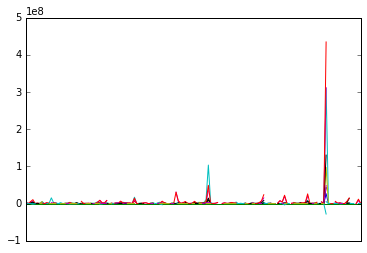

In [17]:
df.loc[:,df.dtypes==np.float].plot(legend=False, xticks=())

Looks like there is a record that is very different that the others... an outlier? Which one is it?

In [18]:
a=(df[df.columns[~df.columns.isin(['email_address'])]] > 3e8).any(1)
df[a]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,0.0,1398517.0,-27992891.0,48521928.0,NaN,NaN


Sort the columns according to the number of NaN values in them?

In [19]:
df.isnull().sum().sort_values(ascending=False)

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
bonus                         64
from_poi_to_this_person       60
shared_receipt_with_poi       60
to_messages                   60
from_this_person_to_poi       60
from_messages                 60
other                         53
expenses                      51
salary                        51
exercised_stock_options       44
restricted_stock              36
email_address                 35
total_payments                21
total_stock_value             20
poi                            0
dtype: int64

Find out if the values of the non-TOTAL rows sum up correctly to the respective values in the TOTAL row

In [20]:
# Find all columns where the TOTAL row has valid values
col_where_total_is_nan = df.loc['TOTAL', df.loc['TOTAL'].notnull()]
# Also remove the POI column
col_where_total_is_nan.drop('poi', inplace=True)
# Get a view of the original DataFrame containing only the columns that carry a valid value for TOTAL
df_tot_check = df[col_where_total_is_nan.index]
# Check if the non-TOTAL rows sum up correctly to the values in the TOTAL row
a = (df_tot_check.loc[~df.index.isin(['TOTAL'])].sum() == df_tot_check.loc['TOTAL'])
# Print the column names that sum up correctly to the TOTAL
a[a==True]

salary                 True
bonus                  True
loan_advances          True
long_term_incentive    True
dtype: bool

Remove the TOTAL row and the "LOCKHART EUGENE E" row, as well as the email column.

In [21]:
df_cleaned = df.drop(['TOTAL', 'LOCKHART EUGENE E'])
del(df_cleaned['email_address'])

In [22]:
df_cleaned.shape

(144, 20)

Separating the cleaned input dataset into features and labels

In [23]:
X, y = df_cleaned.loc[:,~df_cleaned.columns.isin(['poi'])].values, df_cleaned.poi.values.astype(np.int)
names = df_cleaned.index.values
print X.shape, y.shape

(144, 19) (144,)


Learning

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import pydot

Removing NaNs and choosing half of the best features

In [25]:
imputer = Imputer(strategy='median')
X_imputed = imputer.fit_transform(X)
y = y.ravel()
print X_imputed.shape, y.shape
selector = SelectKBest(k=10)
X_new = selector.fit_transform(X_imputed, y)
print X_new.shape

(144, 19) (144,)
(144, 10)


Comparing two Logistic regressions - on the full feature space, and on the KBest-selected one

In [177]:
n_jobs = 1
scoring = 'recall'
clf = LogisticRegression(penalty='l2', random_state=123)
X_new_scaled = StandardScaler().fit_transform(X_new)
X_imputed_scaled = StandardScaler().fit_transform(X_imputed)
print "LogReg on KBest-selected features: ", cross_val_score(clf, X_new, y, n_jobs=n_jobs, scoring=scoring).mean()
print "LogReg on all features: ", cross_val_score(clf, X_imputed, y, n_jobs=n_jobs, scoring=scoring).mean()
print "LogReg on KBest-selected features, StdScale'd: ",cross_val_score(clf, X_new_scaled, y, n_jobs=n_jobs, scoring=scoring).mean()
print "LogReg on all features, StdScale'd: ", cross_val_score(clf, X_imputed_scaled, y, n_jobs=n_jobs, scoring=scoring).mean()


LogReg on KBest-selected features:  0.222222222222
LogReg on all features:  0.111111111111
LogReg on KBest-selected features, StdScale'd:  0.166666666667
LogReg on all features, StdScale'd:  0.222222222222


Reducing dimensionality via PCA

In [175]:
pca = KernelPCA(n_components=2, kernel='rbf', gamma=100)
print X_imputed_scaled.shape
X_imputed_scaled_pca = pca.fit_transform(X_imputed_scaled, y)
print X_imputed_scaled_pca.shape
#print pca.explained_variance_ratio_
print "LogReg on PCA-2 features: ", cross_val_score(clf, X_imputed_scaled_pca, y, n_jobs=n_jobs).mean()

(144, 19)
(144, 2)
LogReg on PCA-2 features:  0.875


Plotting PCA-reduced feature space

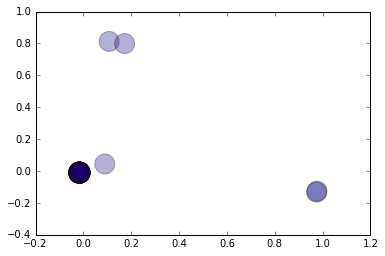

In [122]:
#print X_imputed_scaled_pca
pca1 = X_imputed_scaled_pca.take(0, axis=1)
pca2 = X_imputed_scaled_pca.take(1, axis=1)
#print pca1
plt.scatter(pca1, pca2, c=y*40, s=(y+10)*40, alpha = 0.3)

Trying a RandomForest

In [126]:
clf1 = RandomForestClassifier(n_estimators=30, random_state=123)
print cross_val_score(clf1, X_imputed_scaled_pca, y).mean()

0.875


Trying kernel SVM

In [174]:
del(clf2)
clf2 = SVC(random_state=23, kernel='rbf', C=0.1, gamma=0.1)
clf2.fit(X_new_scaled, y)
print cross_val_score(clf2, X_new_scaqled, y, scoring='recall').mean()

0.0


In [169]:
y[y==0].size / float(y.size)

0.875

##### Appendix: See how "final_project_dataset_modified.pkl" is different from "final_project_dataset.pkl"

In [28]:
dm = pickle.load(open("final_project_dataset_modified.pkl"))
do = d

In [29]:
len(dm)

143

In [30]:
set(do.keys())-set(dm.keys())

{'LAY KENNETH L', 'SKILLING JEFFREY K', 'TOTAL'}

In [31]:
len(dm[dm.keys()[0]])

21

In [32]:
do.pop('LAY KENNETH L',"")
do.pop('SKILLING JEFFREY K',"")
do.pop('TOTAL',"")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [33]:
len(do)

143

In [34]:
do==dm

False

In [35]:
set(do.keys())==set(dm.keys())

True

In [36]:
set(dm[dm.keys()[0]].keys())-set(do[do.keys()[0]].keys())

set()

In [37]:
for k in do.keys():
    if do[k] != dm[k]:
        print k

BHATNAGAR SANJAY
